# Mooring Synthesis of Initial NC data (offline)

## 22CKP-1A

- compare currents from ADCP and SG

In [1]:
import xarray as xa
import pandas as pd
import numpy as np
import cmocean

In [13]:
#wrap the plot in image settings for visual appeal
# may be able to make this cleaner or just a preset
%run '../../../settings/mpl_plot_settings.py'

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

from EcoFOCIpy.plots import TimeSeriesStickPlot

<Figure size 640x480 with 0 Axes>

In [11]:
ncfiles = '/Users/bell/ecoraid/2022/Moorings/22ckp1a/final_data_cf/22ckp1*sg*.nc'
ncfiles_2 = '/Users/bell/ecoraid/2022/Moorings/22ckp1a/final_data_cf/22ckp1*velein*.nc'
mfd = xa.open_mfdataset(ncfiles, chunks=None)
mfd_2 = xa.open_mfdataset(ncfiles_2, chunks=None)
mfd_2

<xarray.Dataset>
Dimensions:          (time: 7919, depth: 17, latitude: 1, longitude: 1)
Coordinates:
  * time             (time) datetime64[ns] 2022-11-01 ... 2023-09-26T22:00:00
  * depth            (depth) float64 -0.0 2.0 4.0 6.0 ... 26.0 28.0 30.0 32.0
  * latitude         (latitude) float64 70.84
  * longitude        (longitude) float64 -163.1
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 dask.array<chunksize=(1, 1, 7919, 17), meta=np.ndarray>
    v_curr_comp      (latitude, longitude, time, depth) float64 dask.array<chunksize=(1, 1, 7919, 17), meta=np.ndarray>
    w_curr_comp      (latitude, longitude, time, depth) float64 dask.array<chunksize=(1, 1, 7919, 17), meta=np.ndarray>
    w_curr_comp_err  (latitude, longitude, time, depth) float64 dask.array<chunksize=(1, 1, 7919, 17), meta=np.ndarray>
    agc1             (latitude, longitude, time, depth) float64 dask.array<chunksize=(1, 1, 7919, 17), meta=np.ndarray>
    agc2             (latitude, longitude, time, depth) float64 dask.array<chunksize=(1, 1, 7919, 17), meta=np.ndarray>
    agc3             (latitude, longitude, time, depth) float64 dask.array<chunksize=(1, 1, 7919, 17), meta=np.ndarray>
    agc4             (latitude, longitude, time, depth) float64 dask.array<chunksize=(1, 1, 7919, 17), meta=np.ndarray>
Attributes: (12/13)
    Latitude_DegMMddW:                      70 50.163 N
    Longitude_DegMMddN:                     163 7.765 W
    MooringID:                              22CKP-1A
    platform_deployment_date:               2022-10-16T18:37:00Z
    platform_deployment_cruise_name:        SKQ2022-14S
    platform_recovery_date:                 2023-09-26T21:42:00Z
    ...                                     ...
    platform_deployment_recovery_comments:  MTR's on release were not deployed.
    WaterDepth:                             44.0
    date_created:                           2024-03-06T10:42:06Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                  removed U,V >500cm/s  trimmed a...

## Temperature (full temporal resolution)

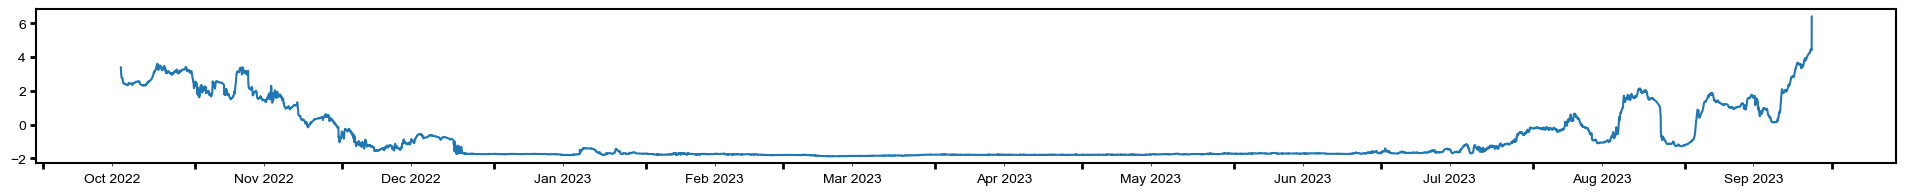

In [12]:
upper_temp = mfd.temperature.max(axis=0).max(axis=0).values
lower_temp = -2

fig, ax = plt.subplots(1,figsize=(24, 2))
plt.plot(mfd.time,mfd.temperature.isel({'latitude':0,'longitude':0,'depth':0}))

ax.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_formatter(DateFormatter('%b %Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)


Text(0, 0.5, 'Velocity(cm/s) \n Depth:32.0m ')

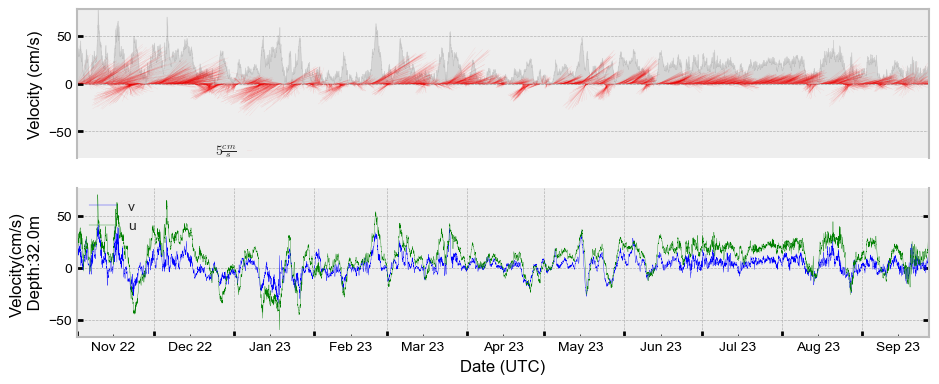

In [17]:
p1 = TimeSeriesStickPlot.Timeseries1dStickPlot()
i=-1
plt1, fig1 = p1.plot(timedata=mfd_2.time, 
                 udata=mfd_2.isel(depth=i,latitude=0,longitude=0).u_curr_comp, 
                 vdata=mfd_2.isel(depth=i,latitude=0,longitude=0).v_curr_comp,
                 rotate=0,
                 ylabel = f'Velocity(cm/s) \n {mfd_2.isel(depth=i).depth.values}m ')
plt1.ylabel(f'Velocity(cm/s) \n Depth:{mfd_2.isel(depth=i).depth.values}m ')


/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)


Text(0, 0.5, 'Velocity(cm/s) \n Depth:40.5m ')

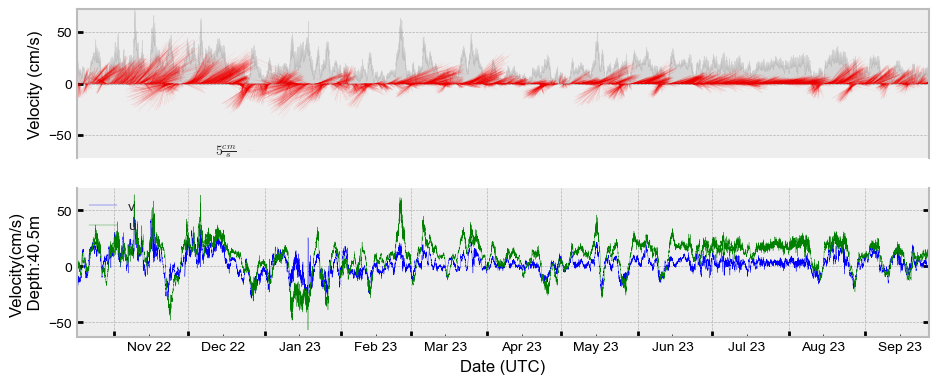

In [21]:
plt1, fig1 = p1.plot(timedata=mfd.time, 
                 udata=mfd.isel(depth=0,latitude=0,longitude=0).u_curr_comp, 
                 vdata=mfd.isel(depth=0,latitude=0,longitude=0).v_curr_comp,
                 rotate=0,
                 ylabel = f'Velocity(cm/s) \n {mfd.isel(depth=0).depth.values}m ')
plt1.ylabel(f'Velocity(cm/s) \n Depth:{mfd.isel(depth=0).depth.values}m ')


In [20]:
mfd.

<xarray.Dataset>
Dimensions:          (time: 16566, depth: 1, latitude: 1, longitude: 1)
Coordinates:
  * time             (time) datetime64[ns] 2022-10-16T19:00:00 ... 2023-09-26...
  * latitude         (latitude) float64 70.84
  * longitude        (longitude) float64 -163.1
  * depth            (depth) float64 40.5
Data variables:
    oxy_percentsat   (time, depth, latitude, longitude) float64 dask.array<chunksize=(16566, 1, 1, 1), meta=np.ndarray>
    oxy_temperature  (time, depth, latitude, longitude) float64 dask.array<chunksize=(16566, 1, 1, 1), meta=np.ndarray>
    current_speed    (time, depth, latitude, longitude) float64 dask.array<chunksize=(16566, 1, 1, 1), meta=np.ndarray>
    v_curr_comp      (time, depth, latitude, longitude) float64 dask.array<chunksize=(16566, 1, 1, 1), meta=np.ndarray>
    u_curr_comp      (time, depth, latitude, longitude) float64 dask.array<chunksize=(16566, 1, 1, 1), meta=np.ndarray>
    temperature      (time, depth, latitude, longitude) float64 dask.array<chunksize=(16566, 1, 1, 1), meta=np.ndarray>
    oxy_conc         (time, depth, latitude, longitude) float64 dask.array<chunksize=(16566, 1, 1, 1), meta=np.ndarray>
Attributes: (12/13)
    Latitude_DegMMddW:                      70 50.163 N
    Longitude_DegMMddN:                     163 7.765 W
    MooringID:                              22CKP-1A
    platform_deployment_date:               2022-10-16T18:37:00Z
    platform_deployment_cruise_name:        SKQ2022-14S
    platform_recovery_date:                 2023-09-26T21:42:00Z
    ...                                     ...
    platform_deployment_recovery_comments:  MTR's on release were not deployed.
    WaterDepth:                             44.0
    date_created:                           2023-11-17T06:33:23Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                Declination Correction = 8.648652...